In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-sales-and-ratings/Books_Data_Clean.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms

df = pd.read_csv('/kaggle/input/books-sales-and-ratings/Books_Data_Clean.csv')

# Data Cleaning

In [3]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
# Dropping the null row since it's only 1 and change the 'Publishing Year' to int
df = df.dropna(subset=['Publishing Year'])
df['Publishing Year'] = df['Publishing Year'].astype(int)

In [5]:
# Fill the nulls with the most variables
df['language_code'] = df['language_code'].fillna('eng')

In [6]:
# Rename the column to a right format
df= df.rename(columns={'Publisher ':'publisher', 
                       'Publishing Year':'publishing_year'})

In [7]:
# Replacing labels
df['genre'] = df['genre'].replace('genre fiction', 'fiction')
df['publisher'] = df['publisher'].replace('HarperCollins Publishing', 
                                          'HarperCollins Publishers')

# Exploratory Data Analysis

In [8]:
df.head()

,index,publishing_year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,publisher,units sold
0,0,1975,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [9]:
df.describe()

,index,publishing_year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,534.583723,1971.377923,4.006595,94913.969130,1857.861862,843.771160,4.871319,611.763330,9681.536950
std,309.159198,185.080257,0.247004,31527.713028,3938.558251,2258.596467,3.561121,370.005111,15377.042555
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.000000,1985.000000,3.850000,70382.000000,371.250000,0.000000,1.990000,287.000000,550.000000
50%,535.000000,2003.000000,4.010000,89262.000000,810.840000,272.916000,3.990000,596.000000,3915.000000
75%,802.000000,2010.000000,4.170000,113915.000000,1488.270000,721.554000,6.990000,933.000000,5319.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


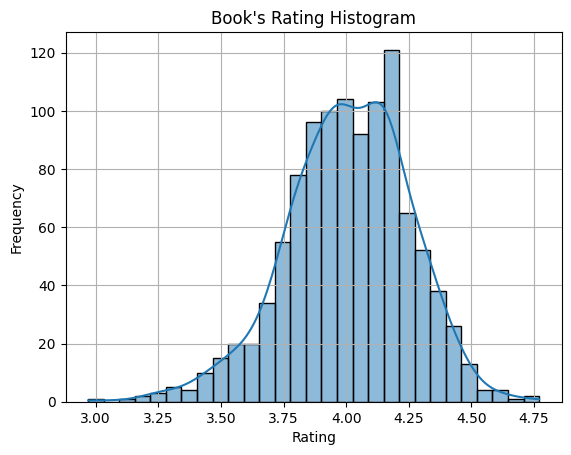

In [10]:
plt.title("Book's Rating Histogram")
plt.grid(True)
sns.histplot(df['Book_average_rating'], kde=True,)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [11]:
df1 = df[df['units sold']<=20000]
df2 = df[df['units sold']>20000]

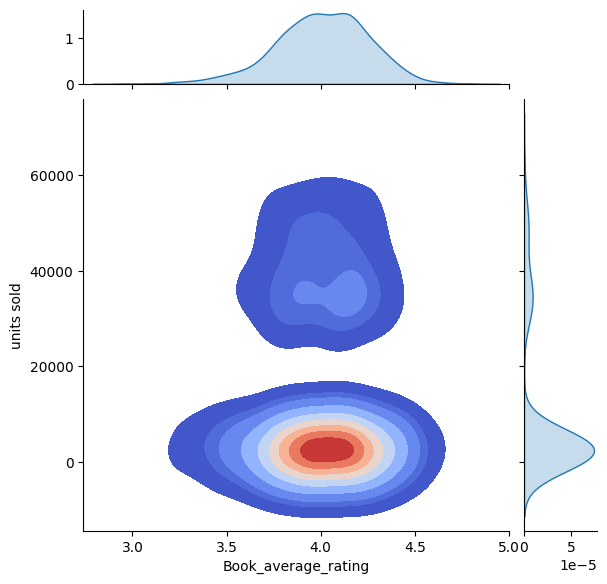


People tends to buy books that have rating around 4.0
probably because it's easier to find on marketplaces


In [12]:
sns.jointplot(data=df, x='Book_average_rating', y='units sold',
              kind='kde', fill=True, cmap='coolwarm', marginal_ticks=True,)
plt.show()
print('\n' + "People tends to buy books that have rating around 4.0")
print( "probably because it's easier to find on marketplaces")

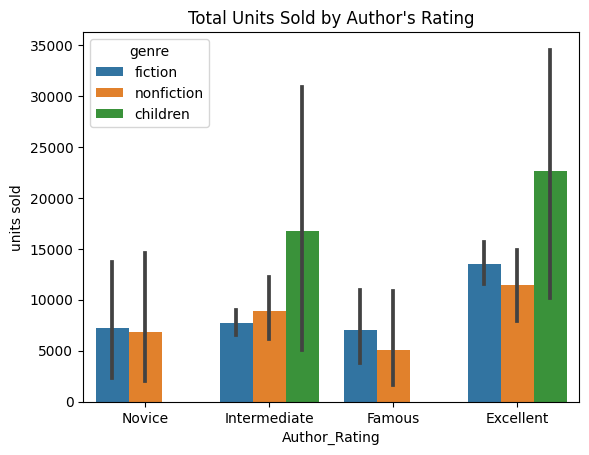

'Excellent' Author tends to sold more books
and Children Books also tends to sold more.


In [13]:
plt.title("Total Units Sold by Author's Rating")
sns.barplot(data=df, x='Author_Rating', y='units sold', hue='genre')
plt.show()
print("'Excellent' Author tends to sold more books")
print("and Children Books also tends to sold more.")

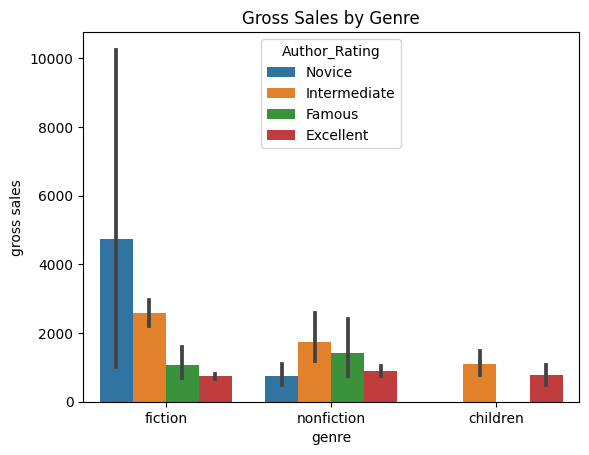

Fiction Books from Novice Authors have the highest gross sales compared to others


In [14]:
plt.title('Gross Sales by Genre')
sns.barplot(data=df, x='genre', y='gross sales', hue='Author_Rating')
plt.show()
print("Fiction Books from Novice Authors have the highest gross sales compared to others")

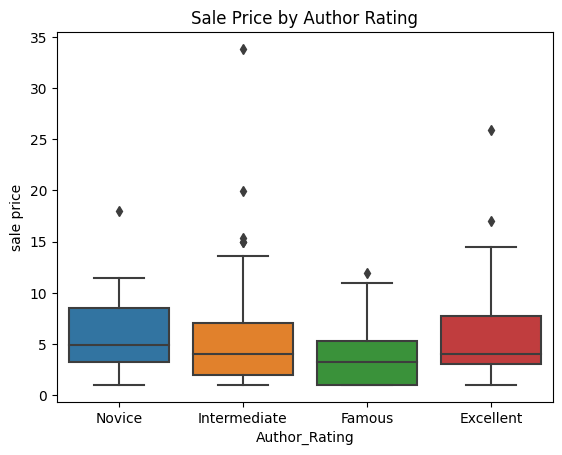

Books from Novice Authors priced more expensively than the others
While Books from Famous Authors are the most cheap


In [15]:
plt.title('Sale Price by Author Rating')
sns.boxplot(data=df, x='Author_Rating', y='sale price')
plt.show()
print("Books from Novice Authors priced more expensively than the others")
print("While Books from Famous Authors are the most cheap")

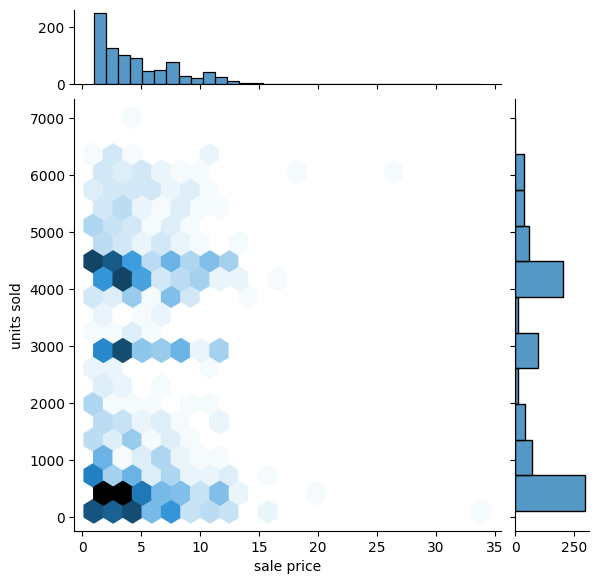

The cheaper a book is, the more it's sold


In [16]:
sns.jointplot(data=df1, x='sale price', y='units sold',
              kind='hex', marginal_ticks=True)
plt.show()
print("The cheaper a book is, the more it's sold")

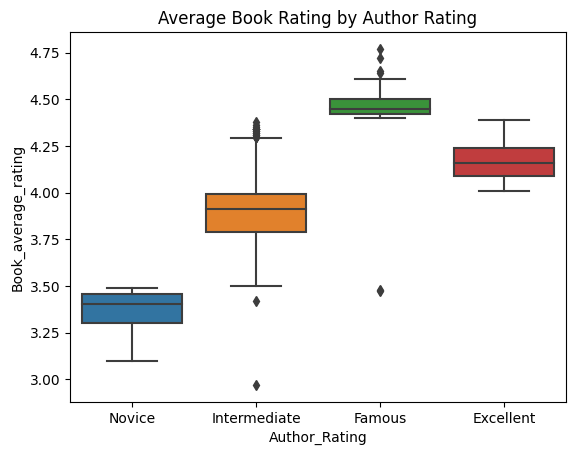

Famous Authors have the most average rating, and Novice Authors are lowest one


In [17]:
plt.title('Average Book Rating by Author Rating')
sns.boxplot(data=df, x='Author_Rating', y='Book_average_rating')
plt.show()
print("Famous Authors have the most average rating, and Novice Authors are lowest one")

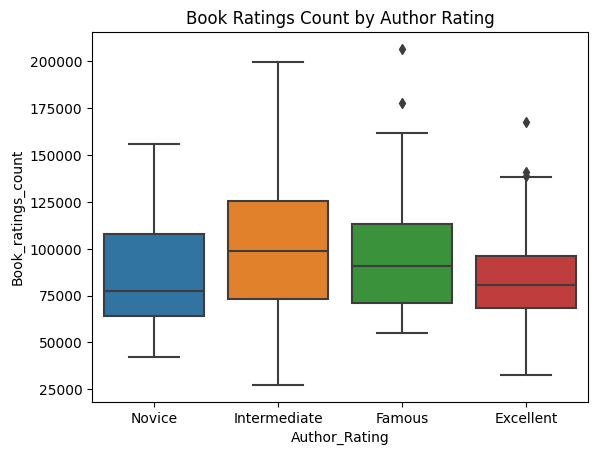

Books from Intermediate Authors are rated more


In [18]:
plt.title("Book Ratings Count by Author Rating")
sns.boxplot(data=df, x='Author_Rating', y='Book_ratings_count')
plt.show()
print("Books from Intermediate Authors are rated more")

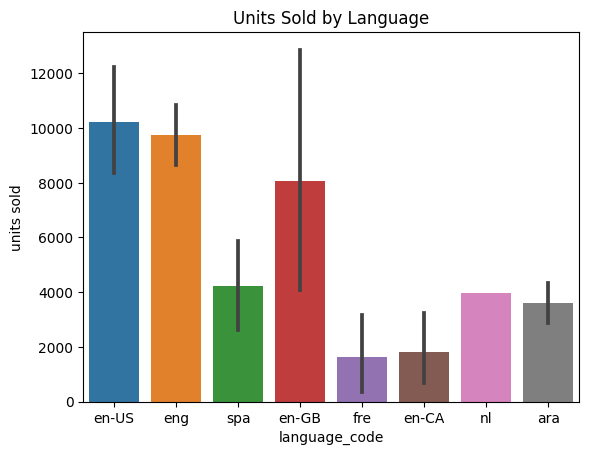

In [19]:
plt.title('Units Sold by Language')
sns.barplot(data=df, x='language_code', y='units sold')
plt.show()

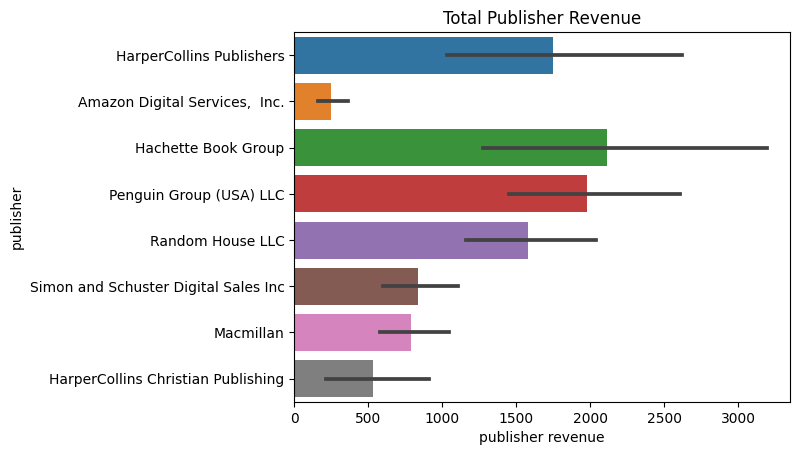

Hachette Book Group has the highest revenue compared to others


In [20]:
plt.title('Total Publisher Revenue')
sns.barplot(data=df, x='publisher revenue', y='publisher')
plt.show()
print("Hachette Book Group has the highest revenue compared to others")

# Summary

1. Books with Rating around 4.0 are sold more and most of them are coming from Intermediate Authors and Excellent Authors.
2. Childern Books from Excellent Authors tends to sold more.
3. Books from Novice Authors have the highest gross sales, because they are priced more expensively.
4. The Cheaper a book is, the more it's sold.
5. English Books (Either they're American or British) tends to sold more.
6. Hachette Book Group has the highest revenue compared to the other publishers.